In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
stunting_df = pd.read_csv(f"https://drive.google.com/uc?export=download&id=1Ql4bOQyd_zacos0lQCCM8IRsryMy1cz1")

stunting_df.rename(columns={
    "Umur (bulan)": "Umur_bulan",
    "Jenis Kelamin": "Jenis_Kelamin",
    "Tinggi Badan (cm)": "Tinggi_Badan_cm",
    "Status Gizi": "Gizi"
}, inplace=True)


stunting_df.head()

,Umur_bulan,Jenis_Kelamin,Tinggi_Badan_cm,Gizi
0,0,laki-laki,44.591973,stunted
1,0,laki-laki,56.705203,tinggi
2,0,laki-laki,46.863358,normal
3,0,laki-laki,47.508026,normal
4,0,laki-laki,42.743494,severely stunted


In [ ]:
train_df = pd.read_csv('https://drive.google.com/uc?export=download&id=1C2o8Tj5RzPYNn5OG5cd8xvvxCUsWb0zz')
test_df = pd.read_csv('https://drive.google.com/uc?export=download&id=1y5Kny4nQ5yBidLdBup44luymqVuecdoW')

train_df.head()

,Umur (bulan),Jenis Kelamin,Tinggi Badan (cm),Status Gizi
0,11,laki-laki,64.0,severely stunted
1,13,laki-laki,79.6,normal
2,15,perempuan,67.8,severely stunted
3,32,perempuan,85.3,normal
4,34,perempuan,79.0,severely stunted


In [ ]:
gender = LabelEncoder()
status = LabelEncoder()

train_df['Jenis Kelamin'] = gender.fit_transform(train_df['Jenis Kelamin'])
test_df['Jenis Kelamin'] = gender.transform(test_df['Jenis Kelamin'])

train_df['Status Gizi'] = status.fit_transform(train_df['Status Gizi'])
test_df['Status Gizi'] = status.transform(test_df['Status Gizi'])

scaler = StandardScaler()
train_df[['Umur (bulan)', 'Tinggi Badan (cm)']] = scaler.fit_transform(train_df[['Umur (bulan)', 'Tinggi Badan (cm)']])
test_df[['Umur (bulan)', 'Tinggi Badan (cm)']] = scaler.transform(test_df[['Umur (bulan)', 'Tinggi Badan (cm)']])

X_train = train_df.drop('Status Gizi', axis=1)
y_train = train_df['Status Gizi']
X_test = test_df.drop('Status Gizi', axis=1)
y_test = test_df['Status Gizi']

model = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(len(status.classes_), activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f'Test accuracy: {test_accuracy:.2f}')

model.save('model.h5')

Epoch 1/20
3025/3025 [==============================] - 7s 2ms/step - loss: 0.2415 - accuracy: 0.9220 - val_loss: 0.0996 - val_accuracy: 0.9745
Epoch 2/20
3025/3025 [==============================] - 9s 3ms/step - loss: 0.0862 - accuracy: 0.9711 - val_loss: 0.0684 - val_accuracy: 0.9814
Epoch 3/20
3025/3025 [==============================] - 6s 2ms/step - loss: 0.0658 - accuracy: 0.9772 - val_loss: 0.0674 - val_accuracy: 0.9714
Epoch 4/20
3025/3025 [==============================] - 7s 2ms/step - loss: 0.0575 - accuracy: 0.9785 - val_loss: 0.0575 - val_accuracy: 0.9750
Epoch 5/20
3025/3025 [==============================] - 6s 2ms/step - loss: 0.0522 - accuracy: 0.9794 - val_loss: 0.0495 - val_accuracy: 0.9800
Epoch 6/20
3025/3025 [==============================] - 8s 3ms/step - loss: 0.0478 - accuracy: 0.9811 - val_loss: 0.0606 - val_accuracy: 0.9738
Epoch 7/20
3025/3025 [==============================] - 6s 2ms/step - loss: 0.0464 - accuracy: 0.9813 - val_loss: 0.0402 - val_accuracy:

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Menyimpan model .tflite
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)

757/757 [==============================] - 1s 1ms/step


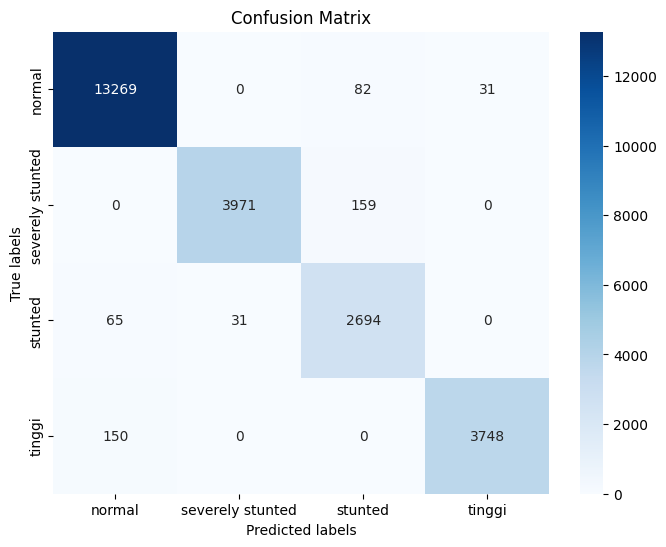

In [ ]:
predictions = model.predict(X_test)
y_pred = predictions.argmax(axis=1)

cm = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=status.classes_, yticklabels=status.classes_)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
min_height_df = pd.read_csv('https://drive.google.com/uc?export=download&id=15vAM6bGGDWABVc6sk5pZv5jb_ue8APvN')
min_height_df['Tinggi_Minimal_cm'] = min_height_df['Tinggi_Minimal_cm'].round(1)

# Get user input
age = int(input("Masukkan umur dalam bulan: "))
gender = int(input("Masukkan jenis kelamin (0 untuk laki-laki, 1 untuk perempuan): "))
height = float(input("Masukkan tinggi badan dalam cm: "))

def get_min_height(age, gender):
    min_height = min_height_df[(min_height_df['Umur_bulan'] == age) & (min_height_df['Jenis_Kelamin'] == gender)]['Tinggi_Minimal_cm'].values
    if len(min_height) > 0:
        return min_height[0]
    else:
        return None7

def gender_to_string(gender):
    if gender == 0:
        return "laki-laki"
    elif gender == 1:
        return "perempuan"
    else:
        return "tidak diketahui"

new_data = pd.DataFrame({
    'Umur (bulan)': [age],
    'Jenis Kelamin': [gender],  # Langsung gunakan nilai yang didapat dari input user
    'Tinggi Badan (cm)': [height]
})

new_data[['Umur (bulan)', 'Tinggi Badan (cm)']] = scaler.transform(new_data[['Umur (bulan)', 'Tinggi Badan (cm)']])

new_data_processed = new_data

predictions = model.predict(new_data_processed)
predicted_classes = status.inverse_transform(predictions.argmax(axis=1))
print("\nData Anak")
print(f"Umur: {age} bulan")
print(f"Jenis Kelamin: {gender_to_string(gender)}")
print(f"Tinggi Badan: {height} cm")
print(f"Status Gizi: {predicted_classes[0]}")

# Menampilkan rekomendasi
print("\nInterpretasi")
if predicted_classes[0] in ['stunted', 'severely stunted']:
    min_height = get_min_height(age, gender)
    if min_height is not None:
        print(f"Tinggi ideal untuk anak {gender_to_string(gender)} berusia {age} bulan adalah {min_height} cm. (nama bayi) perlu bertumbuh {(min_height - height).round(1)} cm lagi untuk masuk kategori normal.")
        print("Berikut adalah hal-hal yang direkomendasikan untuk mengatasi stunting pada balita:")
        print("1. Berikan ASI eksklusif selama 6 bulan pertama untuk memastikan nutrisi optimal.")
        print("2. Setelah 6 bulan, berikan MPASI yang kaya nutrisi untuk mendukung pertumbuhan.")
        print("3. Pastikan anak mendapatkan cukup vitamin dan mineral dari makanannya.")
        print("4. Pastikan anak selalu minum air bersih untuk menjaga kesehatan.")
        print("5. Tetapkan jadwal makan yang teratur untuk membentuk pola makan yang sehat.")
        print("6. Jaga kebersihan diri dan lingkungan untuk mencegah infeksi.")
        print("7. Lengkapi imunisasi anak sesuai jadwal untuk mencegah penyakit.")
        print("8. Lakukan pemeriksaan kesehatan rutin untuk memantau perkembangan anak.")
        print("9. Berikan stimulasi fisik dan kognitif untuk mendukung perkembangan otak dan motorik.")
        print("10. Berikan kasih sayang dan perhatian agar anak merasa aman dan dicintai.")

    else:
        print("Data tinggi minimal tidak ditemukan untuk umur dan jenis kelamin yang dimasukkan.")
else:
  print("Selamat! (nama anak) telah berhasil menjaga kondisi gizi dengan baik sehingga tidak termasuk dalam kategori stunting.")
  print("Berikut adalah hal-hal yang direkomendasikan untuk mempertahankan gizi baik:")
  print("1. Teruskan memberikan ASI hingga usia 2 tahun atau lebih sambil mengenalkan makanan padat yang sehat.")
  print("2. Berikan makanan pendamping ASI (MPASI) yang seimbang dan kaya nutrisi.")
  print("3. Pastikan anak mendapatkan cukup vitamin dan mineral untuk mendukung pertumbuhan dan perkembangan.")
  print("4. Jaga agar anak selalu minum air bersih untuk hidrasi yang baik.")
  print("5. Tetapkan jadwal makan yang teratur dan pastikan porsi makan sesuai dengan kebutuhan anak.")
  print("6. Pertahankan kebersihan diri dan lingkungan untuk mencegah infeksi.")
  print("7. Lakukan imunisasi sesuai jadwal untuk mencegah penyakit yang dapat mengganggu tumbuh kembang anak.")
  print("8. Rutin periksakan kesehatan anak ke dokter untuk memantau pertumbuhannya.")
  print("9. Berikan stimulasi fisik dan mental melalui permainan dan aktivitas yang edukatif.")
  print("10. Tunjukkan kasih sayang dan perhatian untuk mendukung perkembangan emosional anak.")



Masukkan umur dalam bulan: 10
Masukkan jenis kelamin (0 untuk laki-laki, 1 untuk perempuan): 1
Masukkan tinggi badan dalam cm: 70
1/1 [==============================] - 0s 33ms/step

Data Anak
Umur: 10 bulan
Jenis Kelamin: perempuan
Tinggi Badan: 70.0 cm
Status Gizi: normal

Interpretasi
Selamat! (nama anak) telah berhasil menjaga kondisi gizi dengan baik sehingga tidak termasuk dalam kategori stunting.
Berikut adalah hal-hal yang direkomendasikan untuk mempertahankan gizi baik:
1. Teruskan memberikan ASI hingga usia 2 tahun atau lebih sambil mengenalkan makanan padat yang sehat.
2. Berikan makanan pendamping ASI (MPASI) yang seimbang dan kaya nutrisi.
3. Pastikan anak mendapatkan cukup vitamin dan mineral untuk mendukung pertumbuhan dan perkembangan.
4. Jaga agar anak selalu minum air bersih untuk hidrasi yang baik.
5. Tetapkan jadwal makan yang teratur dan pastikan porsi makan sesuai dengan kebutuhan anak.
6. Pertahankan kebersihan diri dan lingkungan untuk mencegah infeksi.
7. Lakuk

In [ ]:
# Example age in months
age = 10
# Example gender (1 for female)
gender = 0
# Starting height in cm
height = 65
# Set the initial category to 'Not Normal' to enter the loop
category = 'Not normal'

while category != 'normal':
    # Prepare input data
    input_data = pd.DataFrame({
        'Umur (bulan)': [age],
        'Jenis Kelamin': [gender],  # Langsung gunakan nilai yang didapat dari input user
        'Tinggi Badan (cm)': [height]
        })

    input_data[['Umur (bulan)', 'Tinggi Badan (cm)']] = scaler.transform(input_data[['Umur (bulan)', 'Tinggi Badan (cm)']])
    input = input_data

    predictions = model.predict(input)

    # Get the predicted category
    category_index = predictions[0].argmax(axis=None)  # Get the index of the predicted category
    category = 'normal' if category_index == 0 else 'Not normal'  # Assuming 'Normal' is the 0th index

    if category != 'normal':
        height += 0.1  # Increase height by 0.1 cm for the next iteration

print(f"The minimum height required for a {age}-month-old female to be categorized as normal is {height} cm.")


1/1 [==============================] - 0s 22ms/step
The minimum height required for a 10-month-old female to be categorized as normal is 68.89999999999978 cm.
